In [174]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 1. Read file

(484, 643)


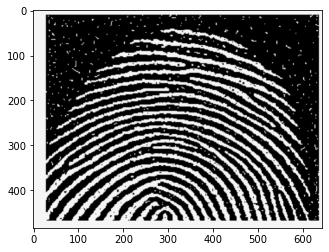

In [175]:
img2 = cv2.imread("../images/huella2.png")
#img2 = cv2.imread("../images/abc.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print(img2.shape)
plt.imshow(img2, cmap='gray')

In [176]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [177]:
structural_element = np.array([[0,1,0],[1,1,1],[0,1,0]])
#structural_element = np.array([[0,1,1,0],[1,1,1,1],[1,1,1,1],[0,1,1,0]])
origin = [1,1]
arr = np.array(structural_array(structural_element, origin))

def structural_array(structural_element, origin):
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            if structural_element[i,j]:
                c.append(np.subtract([i,j], origin))
    return c

In [178]:
def erode(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in range(struct_array.shape[0]):
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter == struct_array.shape[0] 
    return nImg

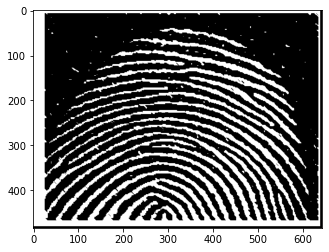

In [179]:
eroded = erode(img2, np.array(structural_array(structural_element, origin)))
plt.imshow(eroded, cmap='gray')

In [180]:
def dilate(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in range(struct_array.shape[0]):
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter > 0
    return nImg

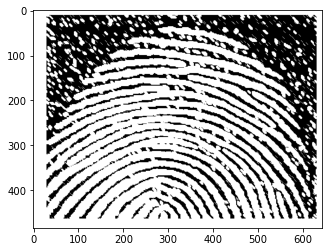

In [181]:
dilated = dilate(img2, np.array(structural_array(structural_element, origin)))
plt.imshow(dilated, cmap='gray')

In [182]:
def open(img, struct_array):
    eroded = erode(img, struct_array)
    dilated = dilate(eroded, struct_array)
    return dilated

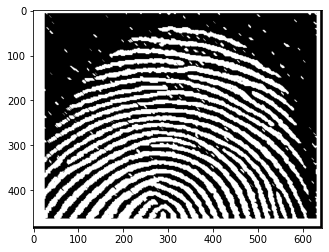

In [183]:
opened = open(img2, arr)
plt.imshow(opened, cmap='gray')

In [184]:
def close(img, struct_array):
    dilated = dilate(img, struct_array)
    eroded = erode(dilated, struct_array)
    return eroded

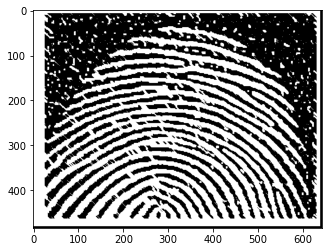

In [185]:
closed = close(img2, np.array(structural_array(structural_element, origin)))
plt.imshow(closed, cmap='gray')